# Homework 5: Sample t and U tests

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

# Problem 3 U statistic (i.e. no distribution assumptions)

One major concern is that we often know nothing about the data. We have no good reason to assume it is from a normal distribution. Instead, we have to use nonparametric statistical tools wherein we do not have to make any assumptions on whether our data comes from a specific population. One option is the U statistic from the Wilcoxon rank-sum test.

The assumption here is that two independent samples were selected from populations having the same distribution, but we don't know what that distribution is.

How to calculate U for small data sets (i.e. direct method)
- U is the number of “wins” between two competing datasets
- For each observation in one set, count the number of times this first value wins over any observations in the other set.
- Count 0.5 for any ties
- The sum of wins and ties is the U for that datasets
- To keep our discussion simple, we will ignore the case of ties

Here's a short example:
- Jason and Mr. N are competing. Jason scores a 100, 55, and 50. Mr. N scores a 90, 80, 60.
- Order the data by wins from highest to lowest and indicate who the score belongs to : J N N N J J
- We can calculate the U for Jason (call it U1) by adding the number of wins for each J entry. Namely, the first J beats N 3 times while the second and third J have no wins. So we get U1 = 3 + 0 + 0.
    - We can do the same calculation for Mr. N and get U2 = 2 + 2 + 2 = 6.
- Now, all we need to interpret these numbers is our absolute favorite thing: **a null distribution!!**

The null distribution for a U statistic is simply the score all of the **possible combinations of outcomes**. For example, if we only had two measurements for J and N, the possible combinations are:
   - JJBB (U1 = 4)
   - JBJB (U1 = 3)
   - JBBJ (U1 = 2)
   - BJBJ (U1 = 1)
   - BBJJ (U1 = 0)
   - BJJB (U1 = 2)

A histogram of the U1's above would be our null distribution. 

In the space below, wrote the code to construct the null distribution of U1 for when 5 samples are collected for each group. Hint: look for packages that can identify all combinations of two vectors...


In [1]:
import numpy as np
from itertools import permutations

n = 5
Jls = ['J']*n
Nls = ['N']*n
wins = Jls + Nls
combinations = list(set(list(permutations(wins, len(wins)))))

Udist = np.empty(len(combinations)).tolist()
for i, combination in enumerate(combinations):
    U = 0
    for j, player in enumerate(combination):
        if player == 'J':
            U += list(combination[j+1:-1]).count('N')
    Udist[i] = U

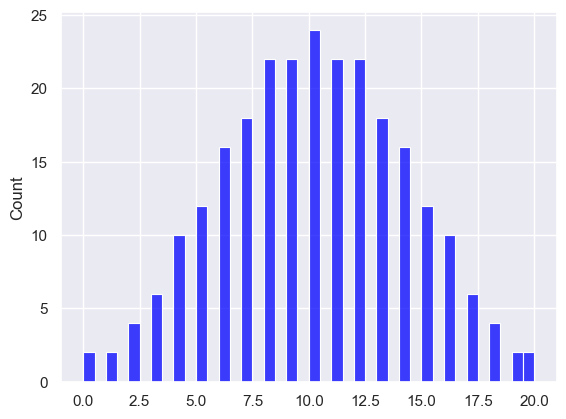

In [2]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
fig = sns.histplot(Udist, bins=40, color='blue')

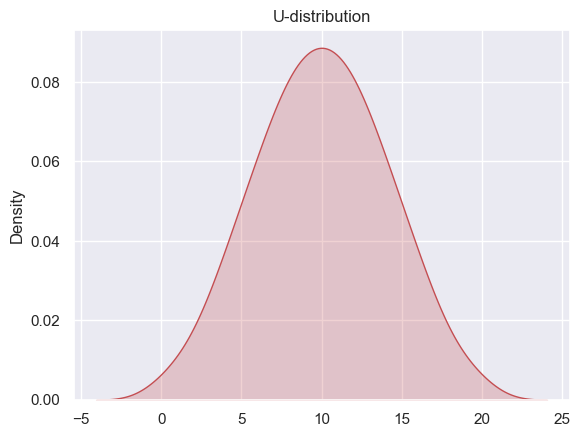

In [3]:
fig = sns.kdeplot(Udist, fill=True, color="r")
plt.title("U-distribution")
plt.show()

You collect two samples:

a = (7,1,2,8,10)
b = (4,5,6,9,11)

Use your distribution to estimate the likelihood (two-sided p value) that a and b come from the same distributions.

In [4]:
from scipy import stats
import statsmodels.api as sm

def tvalue_2Samp(sample1, sample2):
    y = np.concatenate((sample1, sample2))
    x = np.concatenate((np.ones(len(sample1)), np.zeros(len(sample2))))
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    results = model.fit()
    return results.tvalues[1]

A = [7, 1, 2, 8, 10]
B = [4, 5, 6, 9, 11]
tv_2s = tvalue_2Samp(A, B)
p_value = sum(Udist <= tv_2s)/len(Udist)

***